In [83]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [69]:
#what types of questions can we use
#what types of questions would hyptohese testing let us ask 
#linear and logistic regression question 

In [70]:
df = pd.read_csv("../data/hollywood_highest_grossing.csv")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


In [72]:
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [73]:
df.sample()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
505,505,Terminator Salvation (2009),"In 2018, a mysterious new weapon in the war ag...",Warner Bros.,"May 20, 2009",125322469,246030532,371353001,"['Action', 'Sci-Fi']",1 hr 55 min,PG-13


In [74]:
df['Genre'].value_counts()

Genre
['Action', 'Adventure', 'Sci-Fi']                       56
['Comedy']                                              35
['Comedy', 'Romance']                                   30
['Action', 'Adventure', 'Thriller']                     28
['Action', 'Crime', 'Thriller']                         23
                                                        ..
['Biography', 'Comedy', 'Drama', 'Romance']              1
['Drama', 'History']                                     1
['Drama', 'Family']                                      1
['Action', 'Crime', 'Mystery', 'Sci-Fi', 'Thriller']     1
['Comedy', 'Family', 'Fantasy', 'Romance']               1
Name: count, Length: 309, dtype: int64

In [75]:
df['Distributor'].value_counts()

Distributor
Warner Bros.                           158
Walt Disney Studios Motion Pictures    155
Universal Pictures                     119
Twentieth Century Fox                  117
Sony Pictures Entertainment (SPE)      101
Paramount Pictures                      99
DreamWorks                              21
New Line Cinema                         21
Lionsgate                               19
DreamWorks Distribution                 17
Metro-Goldwyn-Mayer (MGM)               12
TriStar Pictures                         9
Miramax                                  9
Revolution Studios                       8
Columbia Pictures                        7
Dimension Films                          7
The Weinstein Company                    6
Summit Entertainment                     5
Fox Searchlight Pictures                 4
STX Entertainment                        3
Orion Pictures                           3
Screen Gems                              3
United Artists                           2

In [76]:
df.head()    

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [77]:
df.groupby('Distributor')['Total Sales'].sum()

KeyError: 'Column not found: Total Sales'

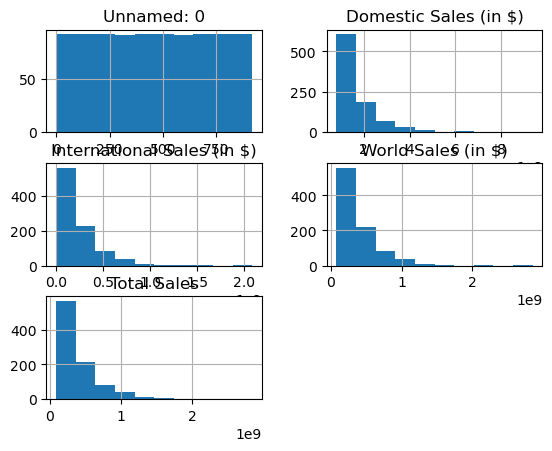

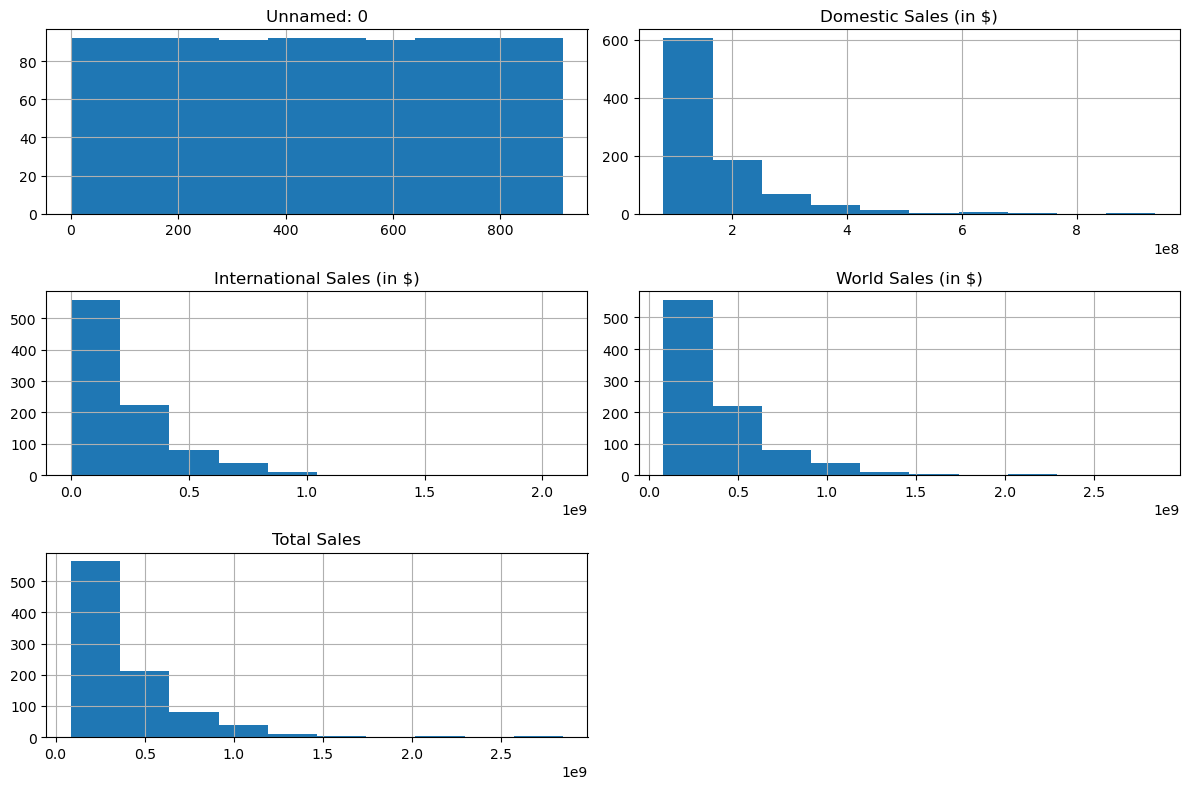

In [ ]:
df.hist()
df.hist(figsize = (12, 8))
plt.tight_layout()

In [ ]:
df.groupby('Distributor')['World Sales (in $)'].mean()

Distributor
20th Century Studios                   3.315038e+08
Artisan Entertainment                  2.486391e+08
Columbia Pictures                      1.963157e+08
Dimension Films                        1.747150e+08
DreamWorks                             4.958560e+08
DreamWorks Distribution                3.420376e+08
FilmDistrict                           1.660948e+08
Focus Features                         2.079614e+08
Fox Searchlight Pictures               2.793561e+08
IFC Films                              3.687440e+08
Lionsgate                              3.946582e+08
Metro-Goldwyn-Mayer (MGM)              3.098237e+08
Miramax                                2.287324e+08
New Line Cinema                        3.364927e+08
Newmarket Films                        6.120545e+08
Orion Pictures                         2.784991e+08
Paramount Pictures                     3.277124e+08
Relativity Media                       2.269040e+08
Revolution Studios                     1.803045e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
 11  Total Sales                 918 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 86.2+ KB


In [ ]:
def convert_runtime(runtime):
    if pd.isna(runtime):
        return np.nan
    runtime = runtime.replace(' min', '').replace(' hr', '')
    parts = runtime.split()
    if len(parts) == 2:
        hours = int(parts[0])
        minutes = int(parts[1])
    elif len(parts) == 1:
        hours = 0
        minutes = int(parts[0])
    else:
        return np.nan
    return hours * 60 + minutes
# Apply the function to the 'Movie Runtime' column
df['Movie Runtime (in minutes)'] = disney_df['Movie Runtime'].apply(convert_runtime)
df[['Title', 'Movie Runtime', 'Movie Runtime (in minutes)']].head()

,Title,Movie Runtime,Movie Runtime (in minutes)
0,Star Wars: Episode VII - The Force Awakens (2015),2 hr 18 min,138
1,Avengers: Endgame (2019),3 hr 1 min,181
2,Avatar (2009),2 hr 42 min,162
3,Black Panther (2018),2 hr 14 min,134
4,Avengers: Infinity War (2018),2 hr 29 min,149


In [ ]:
df.sample(10)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Total Sales,Movie Runtime (in minutes)
239,239,The Croods (2013),"After their cave is destroyed, a caveman famil...",Twentieth Century Fox,"March 15, 2013",187168425,400067558,587235983,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 38 min,PG,587235983,98
158,158,Signs (2002),A widowed former priest living with his childr...,Walt Disney Studios Motion Pictures,"August 2, 2002",227966634,180281283,408247917,"['Drama', 'Mystery', 'Sci-Fi', 'Thriller']",1 hr 46 min,PG-13,408247917,106
631,631,A League of Their Own (1992),Two sisters join the first female professional...,Sony Pictures Entertainment (SPE),"July 1, 1992",107533928,24906141,132440069,"['Comedy', 'Drama', 'Sport']",2 hr 8 min,PG,132440069,128
454,454,Bringing Down the House (2003),When a lonely guy meets a woman on the interne...,Walt Disney Studios Motion Pictures,"March 7, 2003",132716677,32013002,164729679,['Comedy'],1 hr 45 min,PG-13,164729679,105
462,462,The Last Airbender (2010),"Follows the adventures of Aang, a young succes...",Paramount Pictures,"July 1, 2010",131772187,187941694,319713881,"['Action', 'Adventure', 'Family', 'Fantasy']",1 hr 43 min,PG,319713881,103
111,111,Monsters University (2013),A look at the relationship between Mike Wazows...,Walt Disney Studios Motion Pictures,NaN,268492764,475066881,743559645,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 44 min,NaN,743559645,104
6,6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,2201647264,194
691,691,Eagle Eye (2008),Jerry and Rachel are two strangers thrown toge...,DreamWorks,"September 25, 2008",101440743,77326640,178767383,"['Action', 'Mystery', 'Thriller']",1 hr 58 min,PG-13,178767383,118
526,526,The Bodyguard (1992),A former Secret Service agent takes on the job...,Warner Bros.,NaN,122006740,289000000,411006740,"['Action', 'Drama', 'Music', 'Romance', 'Thril...",2 hr 9 min,NaN,411006740,129
506,506,Charlie's Angels (2000),"Three women, detectives with a mysterious boss...",Sony Pictures Entertainment (SPE),"November 3, 2000",125305545,138800000,264105545,"['Action', 'Adventure', 'Comedy', 'Crime', 'Th...",1 hr 38 min,PG-13,264105545,98


### Hypothesis Test

Null Hypothesis (H0): There is no significant differnce in the runtime of an Action movie compared to the global sales. 

Alternate Hypothesis (H1): There is a significant difference in the runtime of an Action movie compared to the global sales.

In [ ]:
# Filter rows that have 'Action' in the 'Genre' column
action_movies = df[df['Genre'].apply(lambda genres: 'Action' in genres)]
action_movies

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Total Sales,Movie Runtime (in minutes)
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2069521700,138
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2797501328,181
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2847246203,162
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,1347597973,134
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2048359754,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,901,Maze Runner: The Scorch Trials (2015),"After having escaped the Maze, the Gladers now...",Twentieth Century Fox,"September 9, 2015",81697192,230598864,312296056,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",2 hr 11 min,PG-13,312296056,131
904,904,Unstoppable (2010),"With an unmanned, half-mile-long freight train...",Twentieth Century Fox,"November 10, 2010",81562942,86242524,167805466,"['Action', 'Thriller']",1 hr 38 min,PG-13,167805466,98
905,905,Payback (1999),"After a successful heist, Porter is left for d...",Paramount Pictures,"February 5, 1999",81526121,80100000,161626121,"['Action', 'Crime', 'Drama', 'Thriller']",1 hr 40 min,R,161626121,100
912,912,Congo (1995),When an expedition to the African Congo ends i...,Paramount Pictures,NaN,81022101,71000000,152022101,"['Action', 'Adventure', 'Mystery', 'Sci-Fi']",1 hr 49 min,NaN,152022101,109


In [ ]:
action_movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 914
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  396 non-null    int64 
 1   Title                       396 non-null    object
 2   Movie Info                  396 non-null    object
 3   Distributor                 396 non-null    object
 4   Release Date                359 non-null    object
 5   Domestic Sales (in $)       396 non-null    int64 
 6   International Sales (in $)  396 non-null    int64 
 7   World Sales (in $)          396 non-null    int64 
 8   Genre                       396 non-null    object
 9   Movie Runtime               396 non-null    object
 10  License                     343 non-null    object
 11  Total Sales                 396 non-null    int64 
 12  Movie Runtime (in minutes)  396 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 43.3+ KB


In [78]:
X = action_movies['Movie Runtime (in minutes)']
y = action_movies['World Sales (in $)']

In [82]:
# t tests let's us look at the randomness of the dataset
t_stat, p_value = ttest_ind(X, y, equal_var = False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -26.737583460661885
P-value: 1.2099724953010463e-90


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)
y_pred = model.predict(X_test.values.reshape(-1,1))
mse = mean_squared_error(y_test, y_pred)


In [99]:
model

LinearRegression()

In [100]:
model.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [101]:
y_pred

array([ 6.81462665e+08,  4.28016412e+08,  4.08138274e+08,  7.01340803e+08,
        5.12498496e+08,  5.32376634e+08,  5.22437565e+08,  4.47894549e+08,
        3.68381999e+08,  4.77711755e+08,  4.47894549e+08, -1.28571440e+08,
        4.47894549e+08,  4.47894549e+08,  3.88260137e+08,  4.03168740e+08,
        6.26797787e+08,  4.03168740e+08,  4.32985946e+08,  4.23046877e+08,
        5.62193840e+08,  3.48503861e+08,  3.83290602e+08,  5.47285237e+08,
        5.27407099e+08,  5.07528962e+08,  4.32985946e+08,  4.92620359e+08,
        4.47894549e+08,  3.48503861e+08,  3.78321068e+08,  5.62193840e+08,
        5.17468031e+08,  3.18686655e+08,  3.18686655e+08,  4.92620359e+08,
        4.77711755e+08,  5.82071978e+08,  4.92620359e+08,  4.62803152e+08,
        3.58442930e+08,  4.32985946e+08,  5.37346168e+08,  4.32985946e+08,
        4.52864084e+08,  3.08747586e+08,  4.52864084e+08,  3.68381999e+08,
        3.43534327e+08,  5.12498496e+08,  4.72742221e+08,  5.12498496e+08,
        5.37346168e+08,  

In [102]:
mse

1.244344333627627e+17